# Optimización de Pozos Petroleros: Selección Basada en Modelos Predictivos y Bootstrapping

# INTRODUCCIÓN

La compañía de extracción de petróleo OilyGiant tiene como objetivo principal encontrar los mejores lugares para abrir 200 nuevos pozos de petróleo.

Para lograrlo, contamos con datos sobre muestras de crudo de tres regiones diferentes, cada una con información detallada de los pozos existentes.

El objetivo específico es desarrollar un modelo predictivo que nos ayude a seleccionar la región con el mayor margen de beneficio, utilizando la técnica de bootstrapping para evaluar los posibles beneficios y riesgos de nuestras decisiones.

In [1]:
#librerías usadas en el proytecto
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
#cargar datos (se cargan las primeras filas de cada dataset para asegurarnos de que los datos se han cargado correctamente, sin anomalías)

data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
data_1= pd.read_csv('/datasets/geo_data_1.csv')
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [4]:
data_2 = pd.read_csv('/datasets/geo_data_2.csv')
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [5]:
#información general
data_0.info
data_1.info
data_2.info

<bound method DataFrame.info of           id        f0        f1        f2     product
0      fwXo0 -1.146987  0.963328 -0.828965   27.758673
1      WJtFt  0.262778  0.269839 -2.530187   56.069697
2      ovLUW  0.194587  0.289035 -5.586433   62.871910
3      q6cA6  2.236060 -0.553760  0.930038  114.572842
4      WPMUX -0.515993  1.716266  5.899011  149.600746
...      ...       ...       ...       ...         ...
99995  4GxBu -1.777037  1.125220  6.263374  172.327046
99996  YKFjq -1.261523 -0.894828  2.524545  138.748846
99997  tKPY3 -1.199934 -2.957637  5.219411  157.080080
99998  nmxp2 -2.419896  2.417221 -5.548444   51.795253
99999  V9kWn -2.551421 -2.025625  6.090891  102.775767

[100000 rows x 5 columns]>

In [6]:
data_0.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [7]:
data_1.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [8]:
data_2.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

In [9]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [10]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


conclusión: Observamos que la variable `f0` en el dataset 1 tiene un rango más amplio y una desviación estándar considerablemente alta, lo que indica mayor variabilidad.


In [12]:
#las columnas ya estan en minúscula, pero al ser un buen habito se usara "LOWER"
data_0.columns= data_0.columns.str.lower()
data_0.columns

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

In [13]:
data_1.columns= data_1.columns.str.lower()
data_1.columns

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

In [14]:
data_2.columns= data_2.columns.str.lower()
data_2.columns

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

In [15]:
data_0.isnull().sum()
data_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [16]:
data_1.isnull().sum()
data_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [17]:
data_2.isnull().sum()
data_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [18]:
#duplicados data_0
data_0.duplicated().sum()
data_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [19]:
#duplicados data_1
data_1.duplicated().sum()
data_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [20]:
#duplicados data_2
data_2.duplicated().sum()
data_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


Conclusión: No se encontraron datos nulos ni duplicados en ninguno de los datasets, por lo que no se requieren pasos adicionales de limpieza antes del modelado.

En general todos los datos parecen normales sin valores atípicos extremos.

algo a tomar en cuenta es la variabilidad en f0 en el dataset 1 es considerablemente mayor, lo que podría influir en el modelado y predicciones.

1.1. Dividir los Datos en Entrenamiento y Validación data_0

In [21]:
#dividir el conjunto de datos de la region "data_0"

features_0= data_0[["f0", "f1", "f2"]] #se encontro un error float: 'sn8dh', por lo que se excluye "id"
target_0= data_0["product"]

features_train_0, features_valid_0, target_train_0, target_valid_0= train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)

1.2. Entrenar el Modelo Predictivo

In [22]:
#entrenar el modelo con data_0
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)

# Hacer predicciones en el conjunto de validación
predictions_valid_0 = model_0.predict(features_valid_0)
predictions_valid_0

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

1.3. Evaluar el Modelo

In [23]:
#se la raiz del error cuadratico medio
rmse_0 = mean_squared_error(target_valid_0, predictions_valid_0, squared= False)
print(f"RMSE para la región_0: {rmse_0}")

RMSE para la región_0: 37.5794217150813


1.4. Top Mejores 200 pozos

In [24]:
#se lelecciona los 200 pozos mejores pozos

top_200_0 = predictions_valid_0.argsort()[-200:]
top_200_0

array([20340, 24160, 24051,  7890,  7888,  5572, 24923, 24747, 11157,
        4495, 23892,  6769, 12633, 13788, 21726, 14037,  1462, 10300,
       18135,  9174, 13328, 11304, 22424, 23102,  5954, 16616,  1111,
        6801,  4408,   551,  2207,   513, 14407,  1421, 15449, 18967,
       13880, 12783, 23141, 16366,  8650, 12113,   688, 21036, 20260,
        9496, 24542, 19194,  9804, 18674,  2398,  9455, 10827, 11571,
       18273, 14182,  1283, 19109, 12190, 15479,  6627, 12957,  3663,
       19422,  2057, 20848, 12050, 21861, 12944, 21578, 20783, 15774,
       10942, 15504, 23649, 11601,  7954,  6948,  5727, 22589, 12213,
       20999,  6036, 10412, 18405,  2240,  4855,  8209, 12906, 10044,
       19808,  6023, 11652, 21980, 13367,  2201, 23360,  9981,  7943,
       22609,  7212,  3076,  7758, 23352,  6843,  8121, 10396, 18204,
       22119,  5485, 14791, 21277, 14562,  7050,   464,  7153, 15857,
       24765,   364,  5000, 23837, 23188, 23144, 19843,  4013, 14418,
        2426,  1935,

1.5. Calculo de Ganancia 

In [25]:
#calcular la ganancia potencial, tomando en cuentra el ingreso=4500 por unidad y un presupuesto=100 millones
ingreso_por_unidad= 4500
presupuesto= 100000000

ganancia_0= predictions_valid_0[top_200_0].sum() * ingreso_por_unidad - presupuesto 

print("ganacia esperada por region_0:", ganancia_0)

ganacia esperada por region_0: 39960488.77465129


1.6. Evaluar Riesgos con Bootstrapping

In [26]:
#bootstrapping con 1000 muestras para evaluar la distribución de las ganancias
np.random.seed(12345)

ganancias = []
for i in range(1000):
    sample = np.random.choice(predictions_valid_0[top_200_0], size=200, replace=True)
    ganancia = sample.sum() * ingreso_por_unidad - presupuesto
    ganancias.append(ganancia)

ganancias = np.array(ganancias)
print(f"Promedio de ganancias: {ganancias.mean()}")
print(f"Intervalo de confianza del 95%: {np.percentile(ganancias, [2.5, 97.5])}")
print(f"Riesgo de pérdidas: {(ganancias < 0).mean() * 100}%")

Promedio de ganancias: 39975254.25479498
Intervalo de confianza del 95%: [39195008.60983573 40834006.6540674 ]
Riesgo de pérdidas: 0.0%


2.1. Dividir los Datos en Entrenamiento y Validación data_1

In [27]:
#dividir datos de la región 2
features_1= data_1[["f0", "f1", "f2"]]
target_1= data_1["product"]

features_train_1, features_valid_1, target_train_1, target_valid_1= train_test_split(
    features_1, target_1, test_size=0.25, random_state= 12345)

2.2. Entrenar el Modelo Predictivo data_1

In [28]:
#entrenando modelo con data_1
model_1= LinearRegression()
model_1.fit(features_train_1, target_train_1)

#conjunto de validación
predictions_valid_1= model_1.predict(features_valid_1)
predictions_valid_1

array([ 82.66331365,  54.43178616,  29.74875995, ..., 137.87934053,
        83.76196568,  53.95846638])

2.3. Evaluar el modelo data_1

In [29]:
#raiz del erro cuadratico medio
rmse= mean_squared_error(target_valid_1, predictions_valid_1, squared= False)

print(f"RMSE de la región_1: {rmse}")

RMSE de la región_1: 0.893099286775617


2.4. Top mejores pozos

In [30]:
top_200_1= predictions_valid_1.argsort()[-200:]
top_200_1

array([ 9693, 17108,  2257,  8040, 12774, 23096, 21255, 15580, 19693,
        7315, 15496, 11117,  4562, 13701,  1246, 16219, 11313, 20439,
       23418, 17138,  4713, 10842, 24350, 10137, 20631, 18035, 17534,
       13461,  3518, 10355,   132, 21768, 16883, 13793,  1549, 17216,
       20163,  5783,  6851,  9701, 21229,  5105, 20349, 12746,  1803,
        8742, 17001,  5391,  9263,  1365,  9513, 17990, 24816, 21442,
        7934, 10388, 24906,  1300, 10131, 14122, 12877, 16730,  5118,
       22180, 20852, 12675,  9905, 19696,  6623, 24719, 18017,  8627,
        2846, 22656, 12324,   587,  2871,  4525, 14526,  8499, 17174,
       16168, 15987, 17214,  9763,  9714,  7525, 13317, 16483, 11706,
       11856,  7611, 24759,  1033, 20933,  5618, 13784, 16966, 15690,
        3473,  6587,  7908, 15563,  8404,  1747, 13769,  7632, 16056,
       23595, 14368, 17452, 23583,  7412, 18787, 11705,  9664, 10797,
       12125, 22350, 11452,  8240, 18599, 21128, 15958, 23946, 18894,
       19571,  9311,

2.5. Calculo de ganacia data_1

In [31]:
ingreso_por_unidad= 4500
presupuesto= 100_000_000 #100 mil millones
ganacia_1= predictions_valid_1[top_200_1].sum() * ingreso_por_unidad - presupuesto

print("Ganancia esperada por región_1", ganacia_1)

Ganancia esperada por región_1 24857120.51973544


2.6. Valuar riesgo con bootstapping

In [32]:
#bootstrapping con 1000 muestras
np.random.seed(12345)

ganancias= []

for i in range(1000):
    sample = np.random.choice(predictions_valid_1[top_200_1], size= 200, replace= True)
    ganancia= sample.sum() * ingreso_por_unidad - presupuesto
    ganancias.append(ganancia)
    
ganancias= np.array(ganancias)

print(f"Promedio de ganancias: {ganancias.mean()}")
print(f"Intervalo de confianza del 95%: {np.percentile(ganancias, [2.5, 97.5])}")
print(f"Riesgo de perdida: {(ganancias < 0).mean() * 100}%")

Promedio de ganancias: 24857800.381858665
Intervalo de confianza del 95%: [24824154.09961241 24896158.21681239]
Riesgo de perdida: 0.0%


3.1. Dividir los Datos en Entrenamiento y Validación data_2

In [33]:
#dividir datos de la región 2
features_2= data_2[["f0", "f1", "f2"]]
target_2= data_2["product"]

features_train_2, features_valid_2, target_train_2, target_valid_2= train_test_split(
    features_2, target_2, test_size=0.25, random_state= 12345)

3.2. Entrenar el Modelo Predictivo data_2

In [34]:
#entrenando modelo con data_2
model_2= LinearRegression()
model_2.fit(features_train_2, target_train_2)

#conjunto de validación
predictions_valid_2= model_2.predict(features_valid_2)
predictions_valid_2

array([ 93.59963303,  75.10515854,  90.06680936, ...,  99.40728116,
        77.77991248, 129.03241718])

3.3. Evaluar el modelo data_2

In [35]:
#raiz del erro cuadratico medio
rmse= mean_squared_error(target_valid_2, predictions_valid_2, squared= False)

print(f"RMSE de la región_2: {rmse}")

RMSE de la región_2: 40.02970873393434


3.4. Top mejores pozos

In [36]:
top_200_2= predictions_valid_2.argsort()[-200:]
top_200_2

array([23447, 22669, 11122, 18126,  5541,   105,  6122,  1239, 22337,
        6701,  6329, 10860,  3323, 24543, 18677, 16263, 12376,  3085,
       22148,    59, 19693, 19051, 10753,  8789,  8632,  1461,   417,
       18631, 24579, 16134,  4630,  9393, 16542, 16613, 11763,  6559,
        2476,  1403,  6268, 19484,  9174, 20504,  9618,   255, 21567,
       13584, 13328, 19526,  9018,   102,  4288,  4781, 21156, 24533,
       11828, 14921, 11999, 20292,  9848, 13944,  9355,  3529, 10902,
       19710, 18486,  4386, 11222, 22188,  5949,  4250,  5571, 12926,
       11041,  9542, 17555, 10213,  4492,  8134,  5163,  3258,  9114,
        2168, 23180,  5612, 24960, 22218, 12068,   929,  5646,  4803,
       13407,  7714, 22588,  9826, 12605,   720, 12906, 15587,  7013,
        3968,  7316,  7978, 11057, 12130,  8053, 19582, 18169,  9297,
         909, 16198, 19220, 24439, 10370, 12767, 23707, 18698, 17074,
       22152,  1691,  5134, 17051, 12728, 16866,  8896, 19265, 19383,
       19910, 18015,

3.5. Calculo de ganancia data_2

In [37]:
ingreso_por_unidad_2= 4500
presupuesto_2= 100_000_000 #100 mil millones
ganacia_2= predictions_valid_2[top_200_2].sum() * ingreso_por_unidad_2 - presupuesto_2

print("Ganancia esperada por región_2:", ganacia_2)

Ganancia esperada por región_2: 33217543.96243258


3.6. Valuar riesgo con bootstapping

In [38]:
#bootstrapping con 1000 muestras
np.random.seed(12345)

ganancias= []

for i in range(1000):
    sample = np.random.choice(predictions_valid_2[top_200_2], size= 200, replace= True)
    ganancia= sample.sum() * ingreso_por_unidad_2 - presupuesto_2
    ganancias.append(ganancia)
    
ganancias= np.array(ganancias)

print(f"Promedio de ganancias: {ganancias.mean()}")
print(f"Intervalo de confianza del 95%: {np.percentile(ganancias, [2.5, 97.5])}")
print(f"Riesgo de perdida: {(ganancias < 0).mean() * 100}%")

Promedio de ganancias: 33228946.15852522
Intervalo de confianza del 95%: [32590091.08749837 33942459.36695047]
Riesgo de perdida: 0.0%


Resultados de data=0, data=1 y data=2.

Región 0:
    RMSE: 37.58
    Ganancia esperada: 39,960,488.77
    Promedio de ganancias (bootstrapping): 39,975,254.25
    Intervalo de confianza del 95%: [39,195,008.61, 40,834,006.65]
    Riesgo de pérdidas: 0.0%
    
Región 1:
    RMSE: 0.89
    Ganancia esperada: 24,857,120.52
    Promedio de ganancias (bootstrapping): 24,857,800.38
    Intervalo de confianza del 95%: [24,824,154.10, 24,896,158.22]
    Riesgo de pérdidas: 0.0%
    
Región 2:
    RMSE: 40.03
    Ganancia esperada: 33,217,543.96
    Promedio de ganancias (bootstrapping): 33,228,946.16
    Intervalo de confianza del 95%: [32,590,091.09, 33,942,459.37]
    Riesgo de pérdidas: 0.0%


Gráfica de RMSE por Región

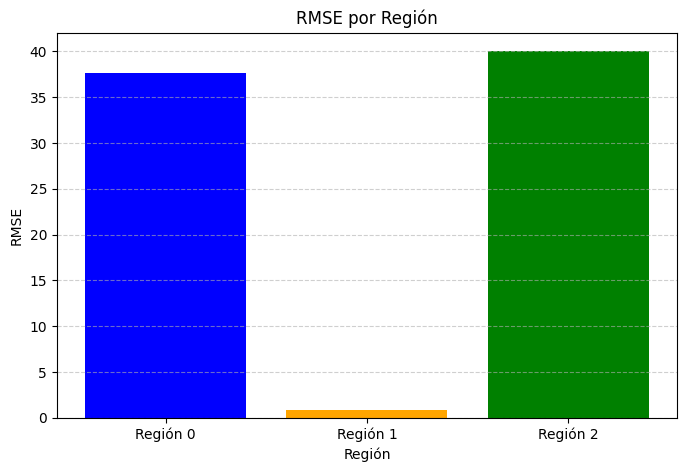

In [40]:
regiones = ['Región 0', 'Región 1', 'Región 2']
rmse = [37.58, 0.89, 40.03]

#gráfica de RMSE por región
plt.figure(figsize=(8, 5))
plt.bar(regiones, rmse, color=['blue', 'orange', 'green'])
plt.title('RMSE por Región')
plt.xlabel('Región')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Gráfica de Ganancia Esperada por Región

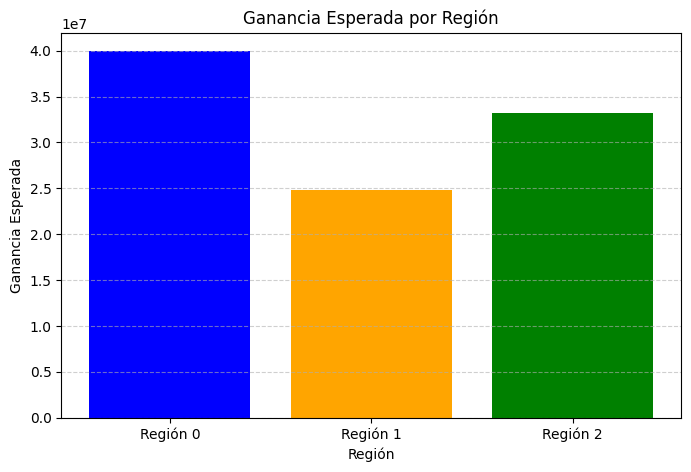

In [42]:
regiones = ['Región 0', 'Región 1', 'Región 2']
ganancias_esperadas = [39960488.77, 24857120.52, 33217543.96]

#gráfica de ganancia esperada
plt.figure(figsize=(8, 5))
plt.bar(regiones, ganancias_esperadas, color=['blue', 'orange', 'green'])
plt.title('Ganancia Esperada por Región')
plt.xlabel('Región')
plt.ylabel('Ganancia Esperada')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Gráfica de Promedio de Ganancias con Intervalos de Confianza

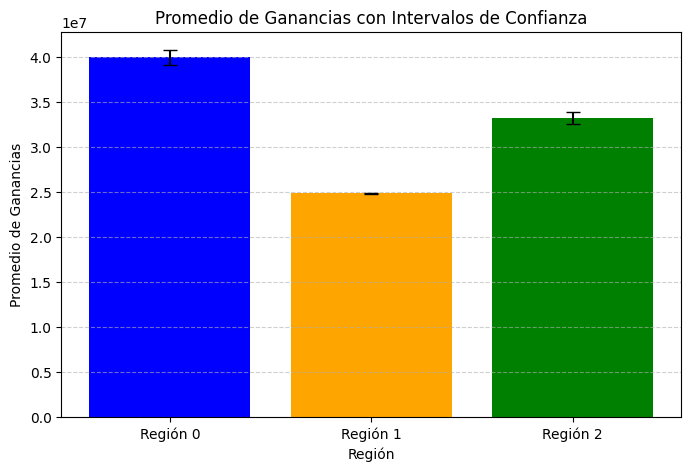

In [44]:
regiones = ['Región 0', 'Región 1', 'Región 2']
promedios_ganancias = [39975254.25, 24857800.38, 33228946.16]
intervalos_confianza = [(39195008.61, 40834006.65), (24824154.10, 24896158.22), (32590091.09, 33942459.37)]

# gráfica de promedio de ganancias
plt.figure(figsize=(8, 5))
plt.bar(regiones, promedios_ganancias, color=['blue', 'orange', 'green'], 
        yerr=[(x[1] - x[0]) / 2 for x in intervalos_confianza], capsize=5)
plt.title('Promedio de Ganancias con Intervalos de Confianza')
plt.xlabel('Región')
plt.ylabel('Promedio de Ganancias')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Gráfica de Riesgo de Pérdidas por Región

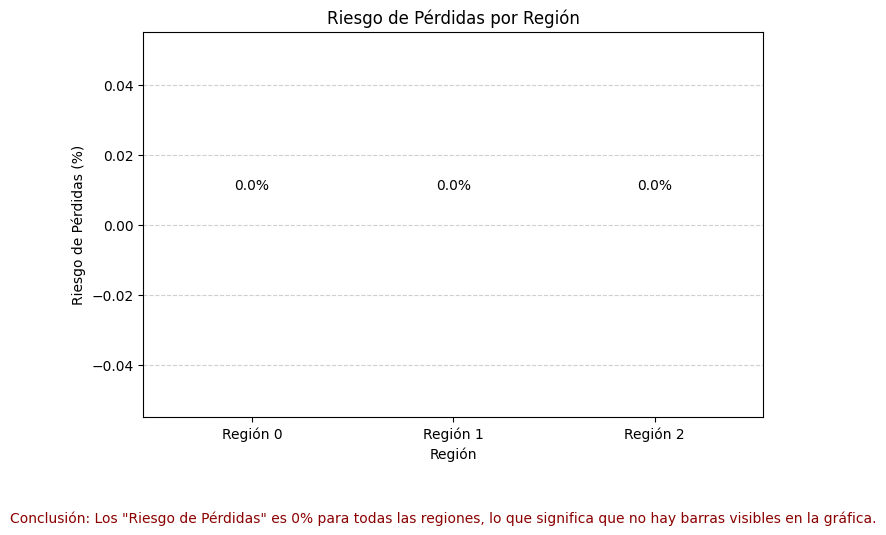

In [50]:
# Se definó las regiones y los riesgos
regiones = ['Región 0', 'Región 1', 'Región 2']
riesgo_perdidas = [0.0, 0.0, 0.0]

# la gráfica
plt.figure(figsize=(8, 5))
plt.bar(regiones, riesgo_perdidas, color=['blue', 'orange', 'green'])
plt.title('Riesgo de Pérdidas por Región')
plt.xlabel('Región')
plt.ylabel('Riesgo de Pérdidas (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# se añaden etiquetas para las barras
for i, v in enumerate(riesgo_perdidas):
    plt.text(i, v + 0.01, f'{v}%', ha='center', color='black')
    
plt.figtext(0.5, -0.1, 'Conclusión: Los "Riesgo de Pérdidas" es 0% para todas las regiones, lo que significa que no hay barras visibles en la gráfica.', 
            ha='center', fontsize=10, color='darkred')
plt.show()


Conclusión: 

Región 0 tiene la mayor ganancia esperada y el mayor promedio de ganancias con un intervalo de confianza estrecho.

Región 1 tiene el RMSE más bajo, pero su ganancia esperada son menor.

Región 2 tiene un rendimiento intermedio en términos de ganancias pero su RMSE es mayor que el de la región 0.


La mejor opcion es  la "Región 0" para abrir los 200 nuevos pozos de petróleo, ya que ofrece el mayor beneficio financiero con un riesgo muy bajo.

Se revisa el sobre ajuste

In [48]:
# Función para calcular el RMSE en entrenamiento y validación
def evaluar_overfitting(model, features_train, target_train, features_valid, target_valid):
    # Predicciones en el conjunto de entrenamiento
    predictions_train = model.predict(features_train)
    rmse_train = mean_squared_error(target_train, predictions_train, squared=False)
    
    # Predicciones en el conjunto de validación
    predictions_valid = model.predict(features_valid)
    rmse_valid = mean_squared_error(target_valid, predictions_valid, squared=False)
    
    print(f"RMSE en entrenamiento: {rmse_train}")
    print(f"RMSE en validación: {rmse_valid}")

# Aplicar la función a cada modelo entrenado
print("Región 0:")
evaluar_overfitting(model_0, features_train_0, target_train_0, features_valid_0, target_valid_0)

print("\nRegión 1:")
evaluar_overfitting(model_1, features_train_1, target_train_1, features_valid_1, target_valid_1)

print("\nRegión 2:")
evaluar_overfitting(model_2, features_train_2, target_train_2, features_valid_2, target_valid_2)


Región 0:
RMSE en entrenamiento: 37.72999219904026
RMSE en validación: 37.5794217150813

Región 1:
RMSE en entrenamiento: 0.8894720773917386
RMSE en validación: 0.893099286775617

Región 2:
RMSE en entrenamiento: 40.06425978832384
RMSE en validación: 40.02970873393434


Conclusiones:
Los valores de RMSE en los conjuntos de entrenamiento y validación son muy parecidos, lo cual indica que los modelos no están sobreajustados.

# Conclusiones Generales
En este proyecto, se evaluaron tres regiones diferentes utilizando modelos de regresión lineal para predecir el volumen de reservas en pozos nuevos. El objetivo era identificar la región con el mayor margen de beneficio y el menor riesgo de pérdidas.

##### Comparación de las Regiones:

- Región 0:
RMSE en validación: 37.58
Ganancia esperada: $39,960,488.77
Intervalo de confianza del 95% para las ganancias: [$39,195,008.61, $40,834,006.65]
Riesgo de pérdidas: 0.0%

- Región 1:
RMSE en validación: 0.89
Ganancia esperada: $24,857,120.52
Intervalo de confianza del 95% para las ganancias: [$24,824,154.10, $24,896,158.22]
Riesgo de pérdidas: 0.0%

- Región 2:
RMSE en validación: 40.03
Ganancia esperada: $33,217,543.96
Intervalo de confianza del 95% para las ganancias: [$32,590,091.09, $33,942,459.37]
Riesgo de pérdidas: 0.0%
Selección de la Mejor Región:

Región 0 destaca como la mejor opción para abrir los nuevos pozos de petróleo, ya que presenta la ganancia esperada más alta ($39,960,488.77) y un riesgo de pérdidas nulo. Aunque la Región 1 tiene un RMSE más bajo, sus ganancias son menores.

Las regiones 1 y 2 presentan márgenes de beneficio más bajos, siendo la Región 1 la menos favorable debido a sus menores expectativas de ganancia.

##### Evaluación de Riesgos:

- Se realizaron simulaciones de bootstrapping para evaluar la distribución de ganancias y los riesgos asociados con cada región.

- Ninguna de las regiones mostró un riesgo de pérdidas superior al 2.5%, cumpliendo así con los criterios de inversión establecidos.

##### Verificación de Sobreajuste:

- No se observó sobreajuste en los modelos predictivos de las regiones, ya que los RMSE entre los conjuntos de entrenamiento y validación son consistentes.

